# Example how to analyze the manifold of any Dataset of Spiking Data in Tonic format (t,x,p) (time,neuron,polarity)

In [1]:
from pathlib import Path
import manifolduntanglinganalysis.preprocessing.datatransforms as datatransforms
import manifolduntanglinganalysis.preprocessing.dataloader as dataloader

# Für Jupyter Notebooks: Finde project_root vom aktuellen Arbeitsverzeichnis aus
current_dir = Path.cwd()
# Navigiere zum project_root (2 Ebenen hoch vom examples-Ordner)
if 'examples' in str(current_dir):
    project_root = current_dir.parent.parent
else:
    # Falls wir schon im project_root sind oder woanders
    project_root = current_dir
    # Versuche, das Projekt-Root zu finden (suche nach typischen Markern)
    for parent in current_dir.parents:
        if (parent / 'manifolduntanglinganalysis').exists() or (parent / 'examples').exists():
            project_root = parent
            break

project_root = Path(project_root).resolve()
data_path = str(project_root / "data" / "input")
print(f"📁 Project Root: {project_root}")
print(f"📁 Data Path: {data_path}")

transform = datatransforms.get_preprocessing(
    n_time_bins=80,
    target_neurons=350,
    original_neurons=700,
    fixed_duration=958007.0
)


# Data loading
test_dataloader = dataloader.load_filtered_shd_dataloader(
    label_range=range(0, 10),
    data_path=data_path,
    transform=transform, 
    train=False, 
    batch_size=64,
    num_samples=512
)

📁 Project Root: /home/karl-/git/SNN-Training-Evolution-Manifold-Untangling-Analysis
📁 Data Path: /home/karl-/git/SNN-Training-Evolution-Manifold-Untangling-Analysis/data/input
📊 Begrenzt auf 512 Samples (von 1079 gefilterten)


## Intrinsic Dimension Estimation of the (Data-)Manifold Later needed for Persistent Homology


In [ ]:
import manifolduntanglinganalysis.analysis.intrinsic_dimension as id_analysis
pca_intdim,fig=id_analysis.explained_variance_dimension(test_dataloader,perc=0.80)
mle_dim = id_analysis.mle_intrinsic_dimension(test_dataloader)
twonn_dim = id_analysis.twonn_intrinsic_dimension(test_dataloader)
fig

✅ Intrinsische Dimension: 26 Dimensionen erklären 80% der Varianz
✅ Plot gespeichert: /home/karl-/git/SNN-Training-Evolution-Manifold-Untangling-Analysis/examples/spiking_Heidelberg_Digits_on_Feed_Forward_Spiking_Neural_Network_complete_pipeline/plots/explained_variance_intrinsic_dimension_pca.png
✅ MLE geschätzte Dimension: 21.04
⚠️ Zu viele Samples (40960), subsample auf 30000 für Two-NN
   (Two-NN ist O(n²) - würde sonst sehr lange dauern)
✅ Two-NN geschätzte Dimension: 30.49


## Manifold Capacity and Mean Field Theory Metrics

In [2]:
from manifolduntanglinganalysis.metrics.mean_field_theoretic_manifold_analysis_wrapper import analyze_manifold_capacity_and_mftma_metrics_of_class_manifolds

results = analyze_manifold_capacity_and_mftma_metrics_of_class_manifolds(
    dataloader=test_dataloader,
    labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    max_samples_per_class=100,
    kappa=0.0,
    n_t=200,
    n_reps=1,
    verbose=True
)

print(f"Capacity: {results['capacity']:.4f}")
print(f"Radius: {results['radius']:.4f}")
print(f"Dimension: {results['dimension']:.4f}")

Analysiere 10 Klassen mit max. 100 Samples pro Klasse
  Sammle Daten für Label 0... ✓ 56 Samples, 4480 Time-Bins
  Sammle Daten für Label 1... ✓ 58 Samples, 4640 Time-Bins
  Sammle Daten für Label 2... ✓ 44 Samples, 3520 Time-Bins
  Sammle Daten für Label 3... ✓ 56 Samples, 4480 Time-Bins
  Sammle Daten für Label 4... ✓ 53 Samples, 4240 Time-Bins
  Sammle Daten für Label 5... ✓ 50 Samples, 4000 Time-Bins
  Sammle Daten für Label 6... ✓ 57 Samples, 4560 Time-Bins
  Sammle Daten für Label 7... ✓ 45 Samples, 3600 Time-Bins
  Sammle Daten für Label 8... ✓ 44 Samples, 3520 Time-Bins
  Sammle Daten für Label 9... ✓ 49 Samples, 3920 Time-Bins

Führe Manifold-Analyse durch...
  10 Klassen mit Daten
    Klasse 0: 4480 Time-Bins, 350 Neuronen
    Klasse 1: 4640 Time-Bins, 350 Neuronen
    Klasse 2: 3520 Time-Bins, 350 Neuronen
    Klasse 3: 4480 Time-Bins, 350 Neuronen
    Klasse 4: 4240 Time-Bins, 350 Neuronen
    Klasse 5: 4000 Time-Bins, 350 Neuronen
    Klasse 6: 4560 Time-Bins, 350 Neuronen

## Manifold Visualization

✅ Plot gespeichert: ../../plots/dimension_reduction_comparison.png


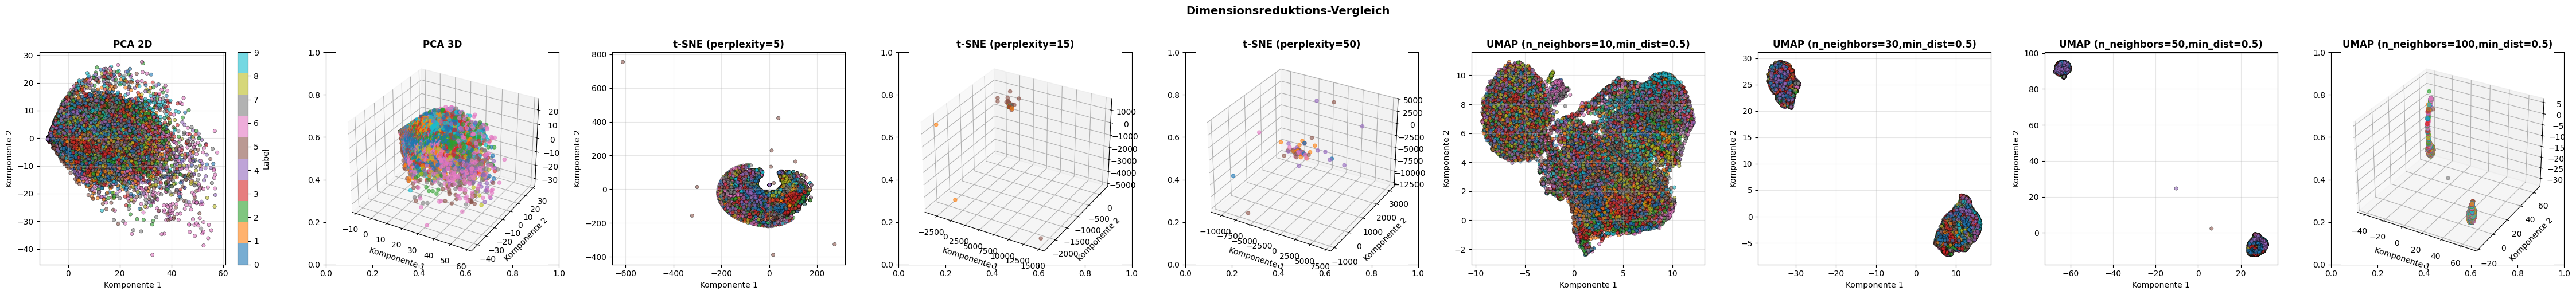

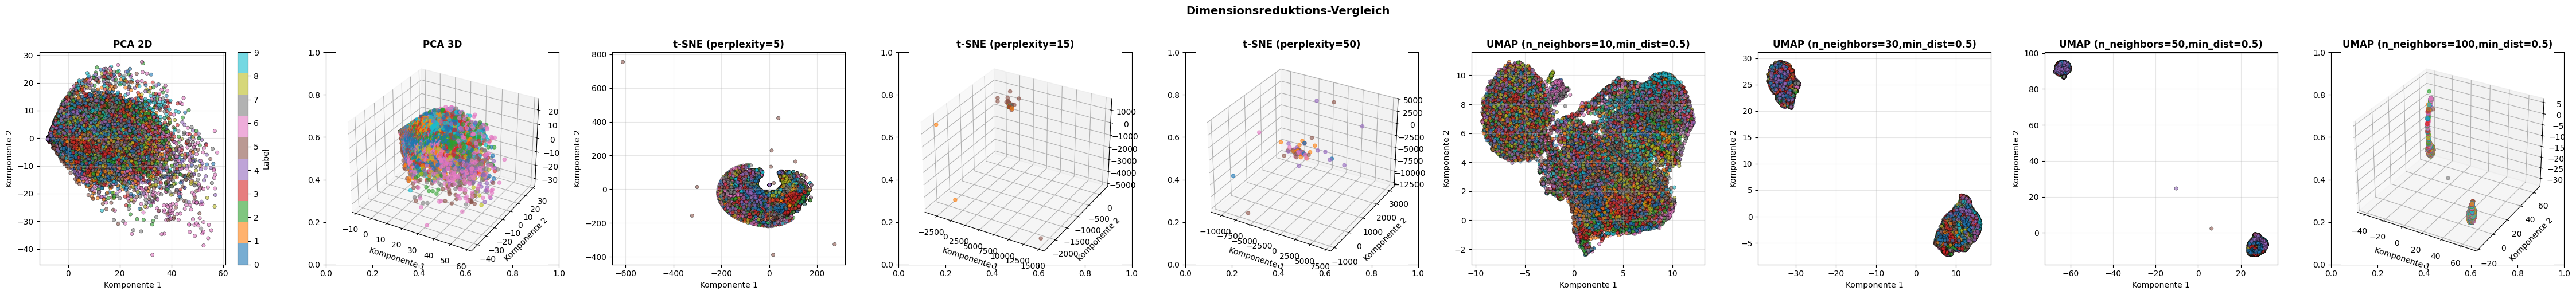

In [ ]:
import manifolduntanglinganalysis.analysis.dimension_reduction_visualisation as dim_vis

dim_reduction_visualizer = dim_vis.DimensionReductionVisualizer(test_dataloader)

dim_reduction_visualizer.add_pca(name="PCA 2D",n_components=2)
dim_reduction_visualizer.add_pca(name="PCA 3D",n_components=3)
dim_reduction_visualizer.add_tsne(name="t-SNE (perplexity=5)",n_components=2,perplexity=5)
dim_reduction_visualizer.add_tsne(name="t-SNE (perplexity=15) 2D",n_components=2,perplexity=15)
dim_reduction_visualizer.add_tsne(name="t-SNE (perplexity=50) 2D",n_components=2,perplexity=50)
dim_reduction_visualizer.add_tsne(name="t-SNE (perplexity=15) 3D",n_components=3,perplexity=15)
dim_reduction_visualizer.add_tsne(name="t-SNE (perplexity=50) 3D",n_components=3,perplexity=50)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=10,min_dist=0.5) 2D",n_components=2,n_neighbors=10,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=30,min_dist=0.5) 2D",n_components=2,n_neighbors=30,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=50,min_dist=0.5) 2D",n_components=2,n_neighbors=50,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=100,min_dist=0.5) 2D",n_components=2,n_neighbors=100,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=100,min_dist=0.5) 3D",n_components=3,n_neighbors=10,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=100,min_dist=0.5) 3D",n_components=3,n_neighbors=30,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=100,min_dist=0.5) 3D",n_components=3,n_neighbors=50,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=100,min_dist=0.5) 3D",n_components=3,n_neighbors=100,min_dist=0.5)
#dim_reduction_visualizer.add_isomap(n_components=2,n_neighbors=5) not enough RAM
fig = dim_reduction_visualizer.build_plot(save_path="../../plots/dimension_reduction_comparison.png")


## Persistent Homology - Persistence Diagrams

In [2]:
import manifolduntanglinganalysis.analysis.dimension_reduction_visualisation as dim_vis

dim_reduction_visualizer = dim_vis.DimensionReductionVisualizer(test_dataloader)
# Mit UMAP auf 50D reduzieren
embeddings = dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=10,min_dist=0.5) 50D",n_components=50,n_neighbors=10,min_dist=0.5).get_embeddings()["UMAP (n_neighbors=10,min_dist=0.5) 50D"]

# Berechne Persistenzdiagramme für alle Klassen
from manifolduntanglinganalysis.analysis.persistence_homology_analysis import compute_and_plot_persistence
# Kombinierter Plot (beide Visualisierungen)
diagrams, fig = compute_and_plot_persistence(
    embeddings=embeddings,
    maxdim=2,
    save_path="plots/persistence_analysis.png",
    show=True
)



/home/karl-/git/SNN-Training-Evolution-Manifold-Untangling-Analysis/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Berechne persistente Homologie für 40960 Punkte...
Maximale Dimension: H2


: 